# BIOS512 Final project

XXXXXXX


In [7]:
 library('tidyverse')
 library('ggplot2')
 library("dplyr")

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [8]:
food <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv")

Parsed with column specification:
cols(
  country = col_character(),
  food_category = col_character(),
  consumption = col_double(),
  co2_emmission = col_double()
)



In [14]:
food %>% print

# A tibble: 1,430 x 4
   country   food_category            consumption co2_emmission
   <chr>     <chr>                          <dbl>         <dbl>
 1 Argentina Pork                           10.5          37.2 
 2 Argentina Poultry                        38.7          41.5 
 3 Argentina Beef                           55.5        1712   
 4 Argentina Lamb & Goat                     1.56         54.6 
 5 Argentina Fish                            4.36          6.96
 6 Argentina Eggs                           11.4          10.5 
 7 Argentina Milk - inc. cheese            195.          278.  
 8 Argentina Wheat and Wheat Products      103.           19.7 
 9 Argentina Rice                            8.77         11.2 
10 Argentina Soybeans                        0             0   
# … with 1,420 more rows


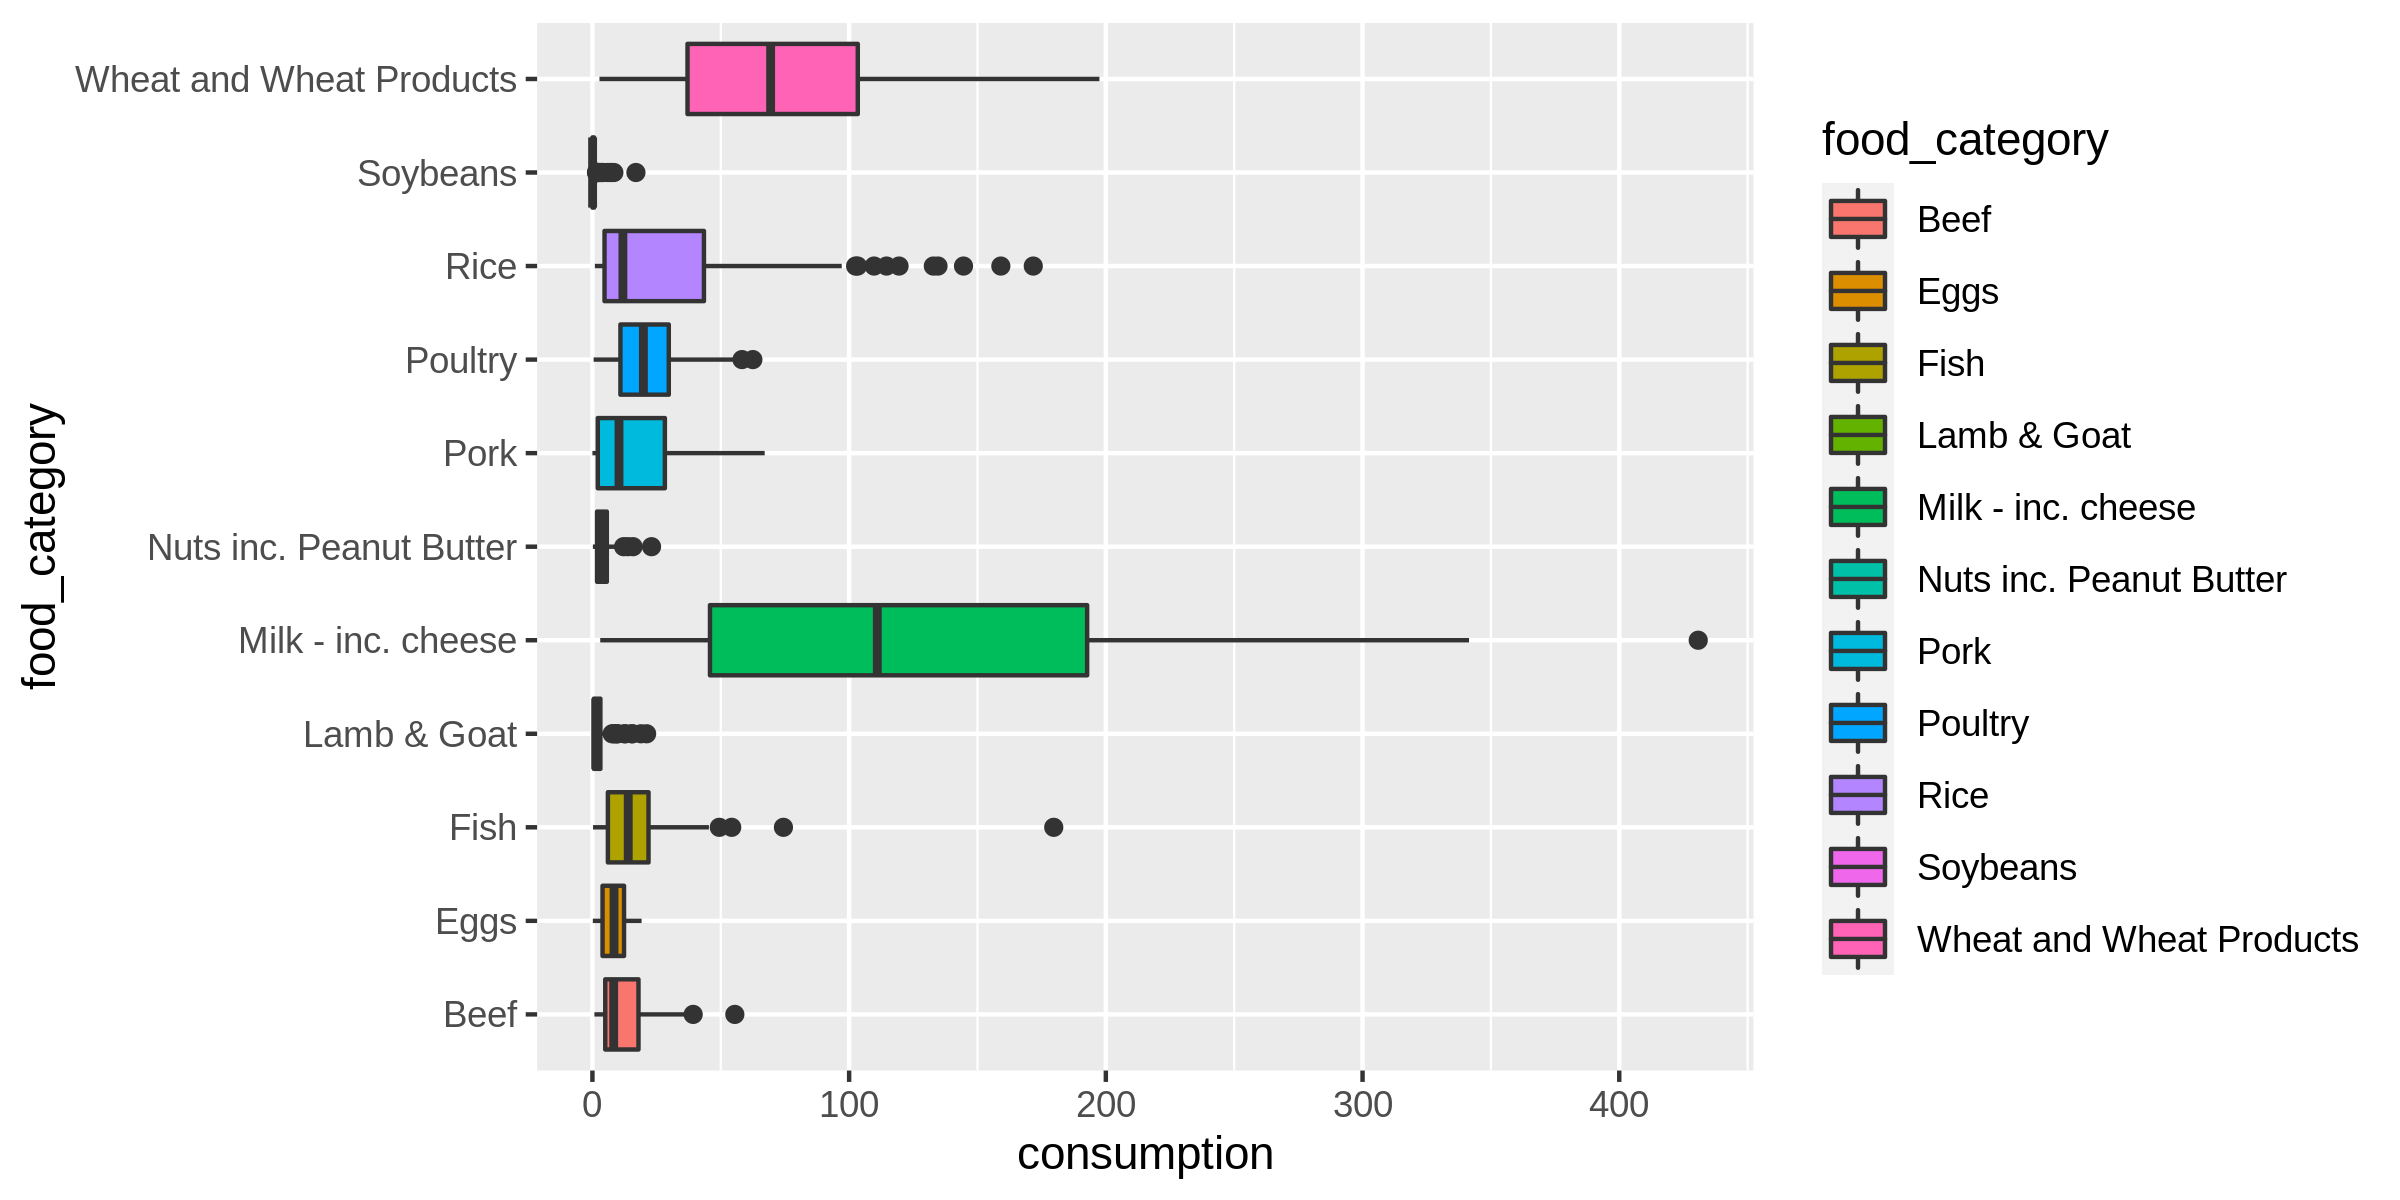

In [29]:
options(repr.plot.res = 300, repr.plot.width = 8, repr.plot.height = 4)

p = ggplot(food, aes(y =consumption, x = food_category, fill =food_category )) +
         geom_boxplot() +
  coord_flip()

p

In [26]:
milk <- food %>%
   filter(food_category %in% c('Milk - inc. cheese')) %>%
   group_by(country, food_category, consumption) %>% 
   count() %>% 
   arrange(desc(consumption))%>%
   filter(consumption >= 40)
milk %>% print

# A tibble: 102 x 4
# Groups:   country, food_category, consumption [102]
   country     food_category      consumption     n
   <chr>       <chr>                    <dbl> <int>
 1 Finland     Milk - inc. cheese        431.     1
 2 Netherlands Milk - inc. cheese        341.     1
 3 Sweden      Milk - inc. cheese        341.     1
 4 Switzerland Milk - inc. cheese        319.     1
 5 Albania     Milk - inc. cheese        304.     1
 6 Lithuania   Milk - inc. cheese        295.     1
 7 Ireland     Milk - inc. cheese        292.     1
 8 Kazakhstan  Milk - inc. cheese        288.     1
 9 Estonia     Milk - inc. cheese        285.     1
10 Denmark     Milk - inc. cheese        277.     1
# … with 92 more rows


In [27]:
milk2 <- pork %>%
   filter(consumption > 200)

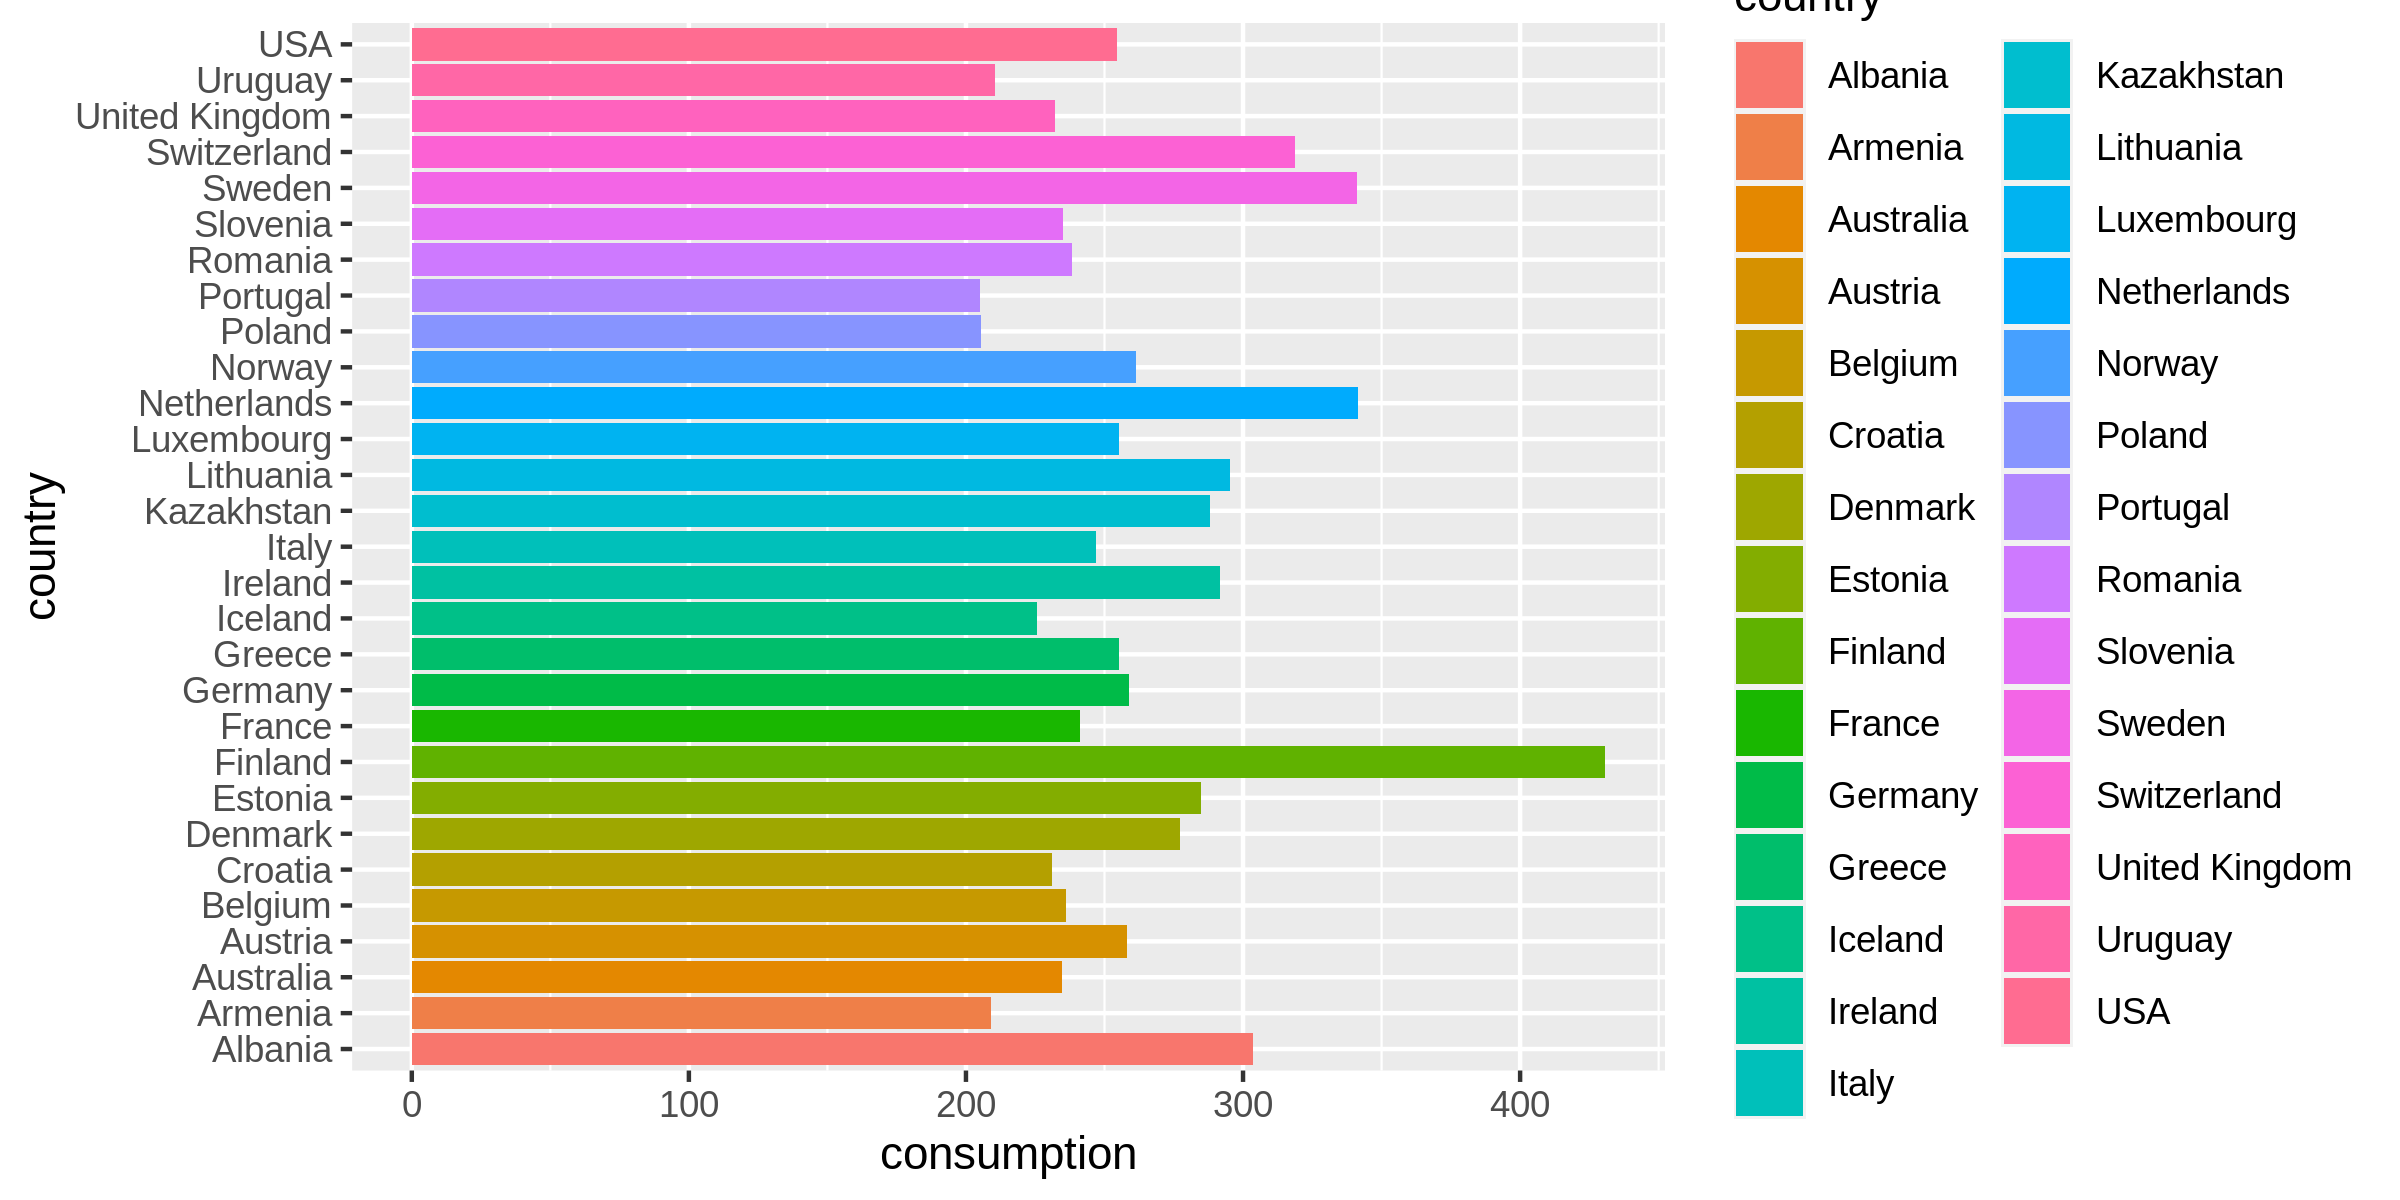

In [28]:
options(repr.plot.res = 300, repr.plot.width = 8, repr.plot.height = 4)

p = ggplot(milk2, aes(x= country, y = consumption, fill= country))

p = p + geom_bar(stat='identity')

p = p + coord_flip()

p

In [24]:
finland <- food %>%
   filter(country %in% c('Finland'))%>%
   group_by(country,food_category,consumption)
 
finland %>% print

# A tibble: 11 x 4
# Groups:   country, food_category, consumption [11]
   country food_category            consumption co2_emmission
   <chr>   <chr>                          <dbl>         <dbl>
 1 Finland Pork                           36.1         128.  
 2 Finland Poultry                        19.9          21.3 
 3 Finland Beef                           19.2         593.  
 4 Finland Lamb & Goat                     0.53         18.6 
 5 Finland Fish                           33.8          54.0 
 6 Finland Eggs                            9.55          8.77
 7 Finland Milk - inc. cheese            431.          614.  
 8 Finland Wheat and Wheat Products       82.0          15.6 
 9 Finland Rice                            4.42          5.66
10 Finland Soybeans                        0.08          0.04
11 Finland Nuts inc. Peanut Butter         3.43          6.07


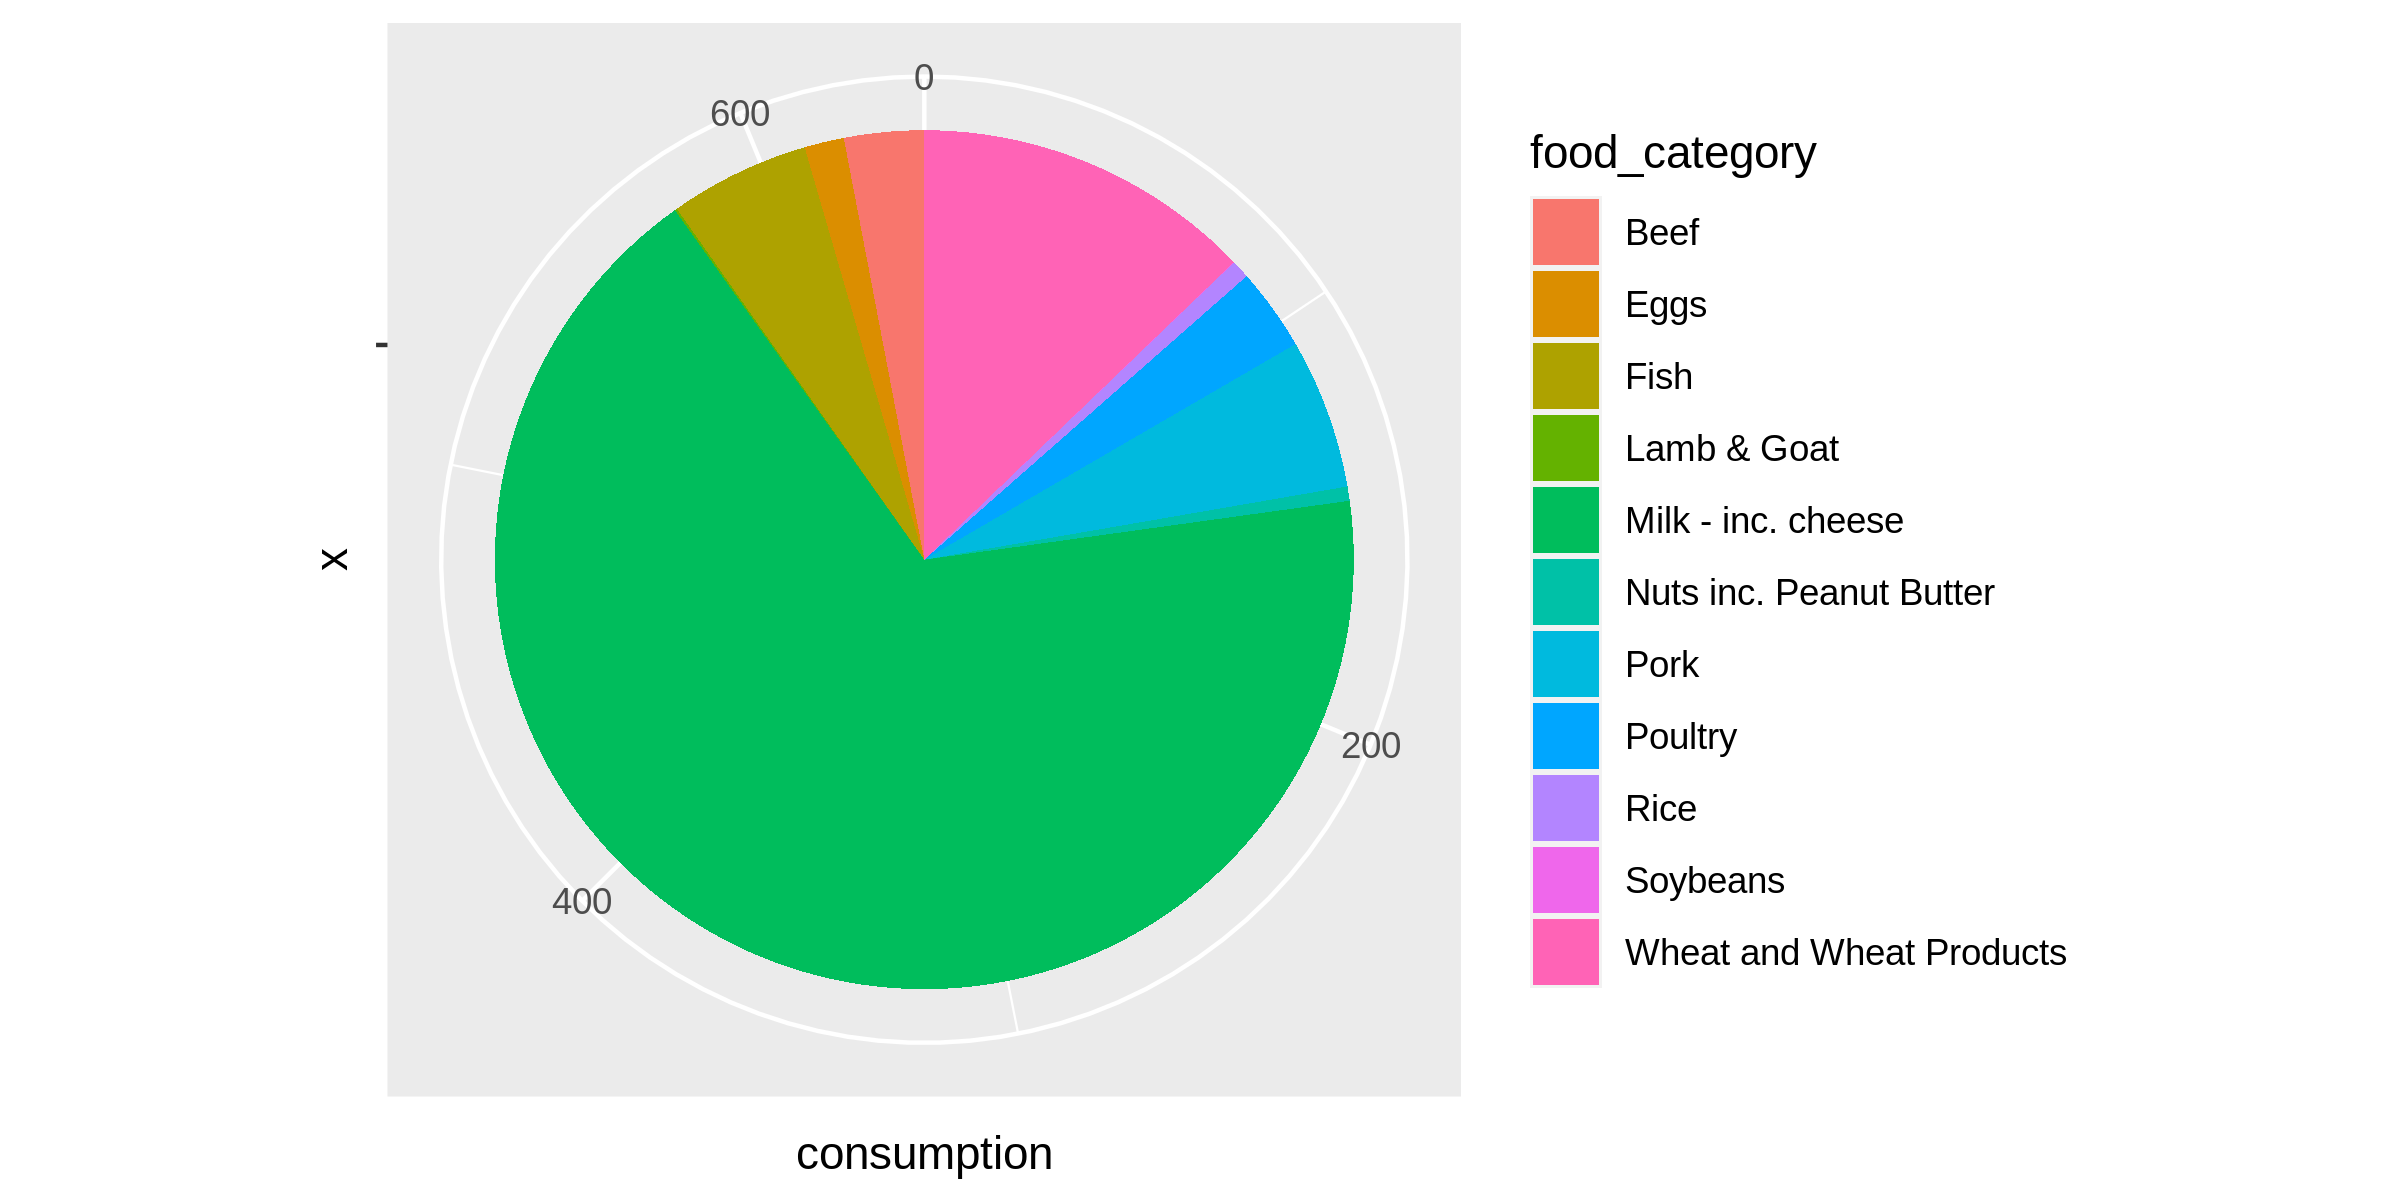

In [25]:
p = ggplot(finland, aes(x = "", y = consumption, fill =food_category ))+
    geom_bar(stat="identity", width=1) +
    coord_polar("y", start=0)

p